# Ultimate Take Home Challenge

## Analyzing the movement of people in rideshares

### Part One: EDA

Intitially, group the data to appropriately analyze common trends in logins by location to create trends

In [207]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
#read with pandas
logins = pd.read_json (r'C:\Users\sagun\Desktop\Springboard\logins.json')

In [209]:
#read with json library
with open(r'C:\Users\sagun\Desktop\Springboard\ultimate_data_challenge.json') as f:
    data = json.load(f)
data = pd.DataFrame(data)
data['last_trip_date']=pd.to_datetime(data['last_trip_date'])
data['signup_date']=pd.to_datetime(data['signup_date'])

Look at head of data to better understand the form

In [210]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [211]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


Using the logins data frame, group by time chunks of 15 minutes, and then aggregate counts. Repeat for 1 hour to make longer time period assessments.

In [212]:
logins['value']=1
logins_15min = logins.groupby(pd.Grouper(key='login_time', freq='15min')).sum().reset_index()
logins_1hr = logins.groupby(pd.Grouper(key='login_time', freq='1H')).sum().reset_index()

Plot the first day of the cycle in both levels of frequency

Text(0.5, 1.0, 'Logins in the First Month, 1 hr')

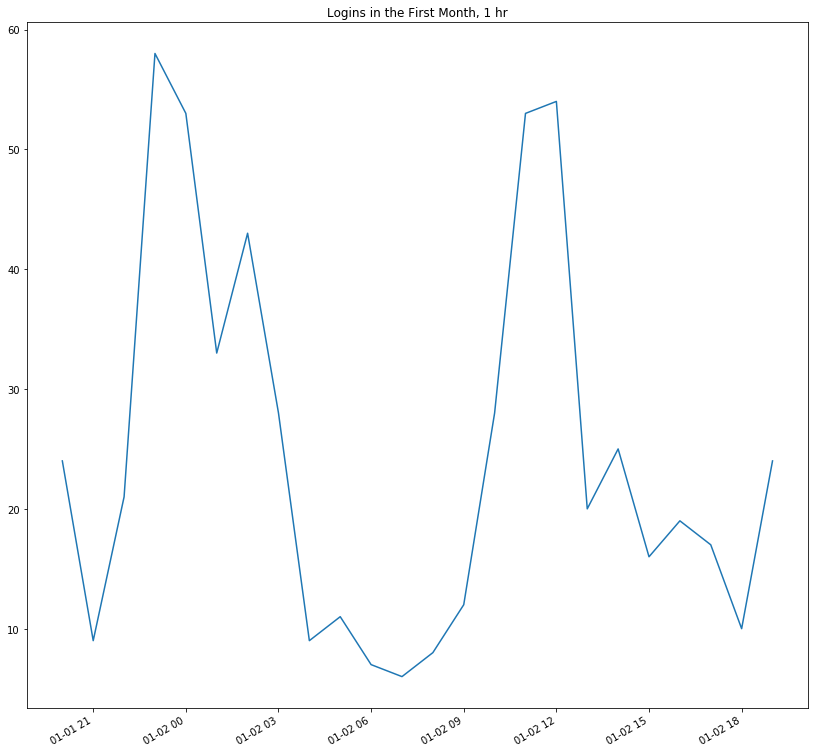

In [213]:
first_day = logins_1hr.head(24)
plt.plot(first_day['login_time'],first_day['value'])
plt.gcf().autofmt_xdate()
plt.title('Logins in the First Month, 1 hr')

Text(0.5, 1.0, 'Logins for First Month, 15 min')

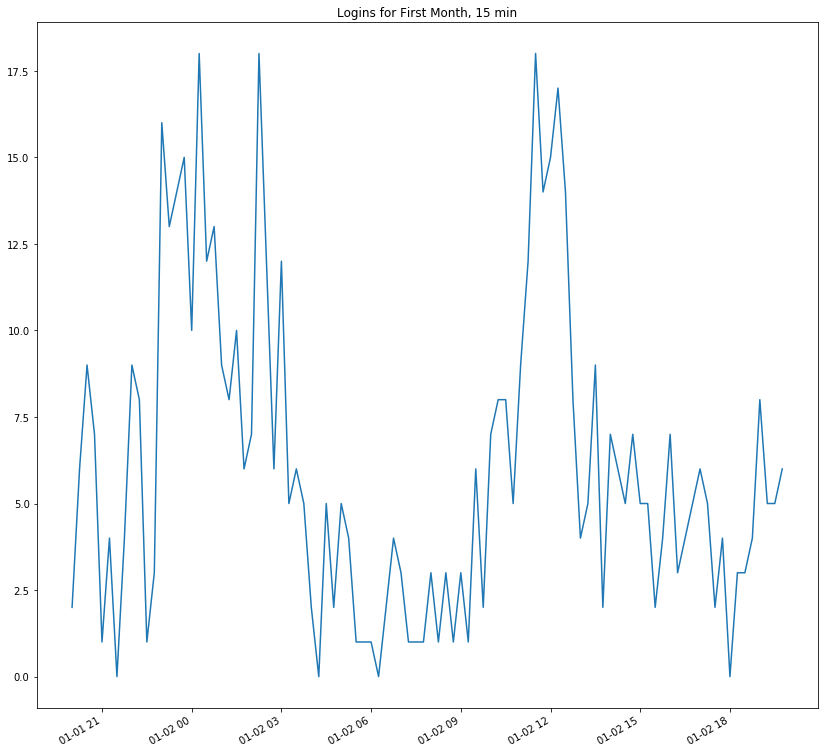

In [214]:
first_day2 = logins_15min.head(96)
plt.plot(first_day2['login_time'],first_day2['value'])
plt.gcf().autofmt_xdate()
plt.title('Logins for First Month, 15 min')

Look at daily break to get an understanding of monthly trends

Text(0, 0.5, 'Frequency of Use')

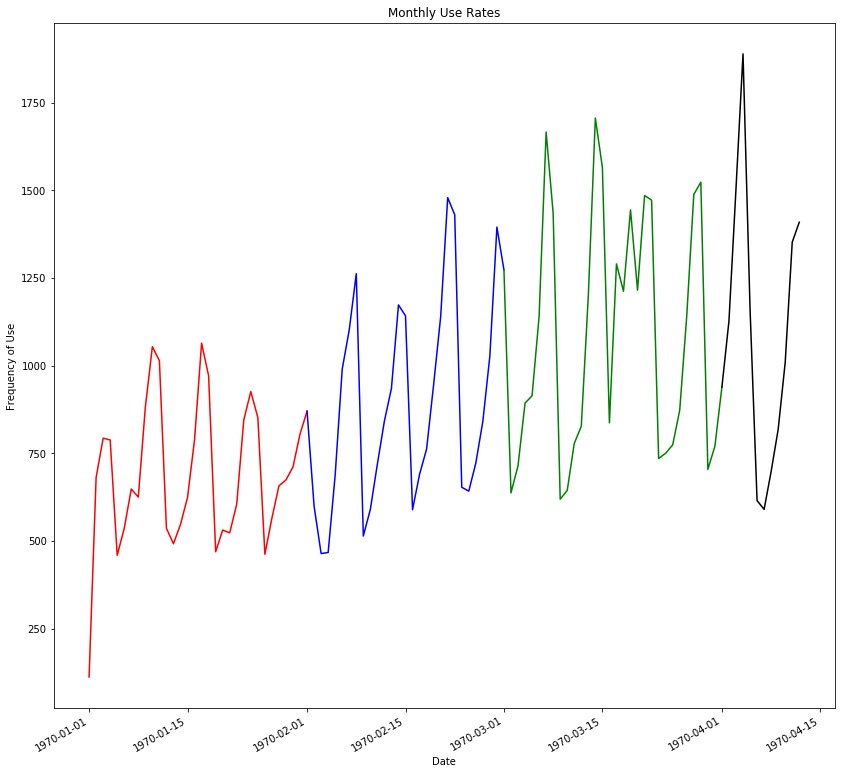

In [215]:
logins_1day = logins.groupby(pd.Grouper(key='login_time', freq='1D')).sum().reset_index()
first_month = logins_1day.head(32)
second_month = logins_1day.iloc[31:60]
third_month = logins_1day.iloc[59:91]
fourth_month = logins_1day.iloc[90:102]
plt.plot(first_month['login_time'],first_month['value'], 'r', second_month['login_time'], second_month['value'],'b',third_month['login_time'],third_month['value'],'g',fourth_month['login_time'],fourth_month['value'],'k')
plt.gcf().autofmt_xdate()
plt.title('Monthly Use Rates')
plt.xlabel('Date')
plt.ylabel('Frequency of Use')

Notice that over the course of the first 4 months of the year, the data appears to trends upward, in that use at the given location of these logins has increased in these 4 months.

Text(0, 0.5, 'Frequency of Use')

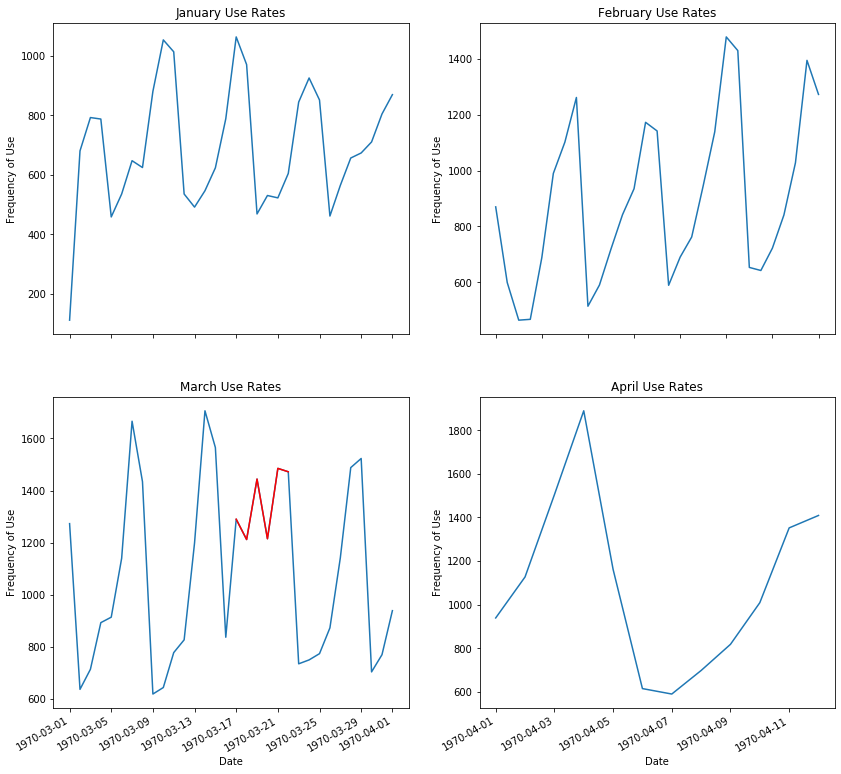

In [216]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,2,1)
plt.plot(first_month['login_time'],first_month['value'])
plt.gcf().autofmt_xdate()
plt.title('January Use Rates')
plt.xlabel('Date')
plt.ylabel('Frequency of Use')

plt.subplot(2,2,2)
plt.plot(second_month['login_time'],second_month['value'])
plt.gcf().autofmt_xdate()
plt.title('February Use Rates')
plt.xlabel('Date')
plt.ylabel('Frequency of Use')

revel_week = third_month.iloc[16:22]
plt.subplot(2,2,3)
plt.plot(third_month['login_time'],third_month['value'])
plt.plot(revel_week['login_time'],revel_week['value'],'r')
plt.gcf().autofmt_xdate()
plt.title('March Use Rates')
plt.xlabel('Date')
plt.ylabel('Frequency of Use')

plt.subplot(2,2,4)
plt.plot(fourth_month['login_time'],fourth_month['value'])
plt.gcf().autofmt_xdate()
plt.title('April Use Rates')
plt.xlabel('Date')
plt.ylabel('Frequency of Use')

When looking at just one month, it can be seen that the use peaks on weekends, where the peaks on the graph exist. This continues in all 4 months in the dataset. Notice that in the case of March, there is one week that bucks the trend (see red). This is in the third week of March, and may have been due to St. Patricks day, which occured on the 17th, and represents the first spot where the graph hikes up that week. As the holiday is often celebrated with excessive drinking, it would make sense that the use of taxis that day would increase. It is also a holiday that can sometimes last over the course of the week, potentially causing the odd use pattern within that week in that month.

In [217]:
logins_1day['weekday'] = logins_1day['login_time'].dt.weekday
weekday_average = logins_1day.groupby(by='weekday').mean().reset_index()

([<matplotlib.axis.XTick at 0x25a4d3d7208>,
 <a list of 7 Text xticklabel objects>)

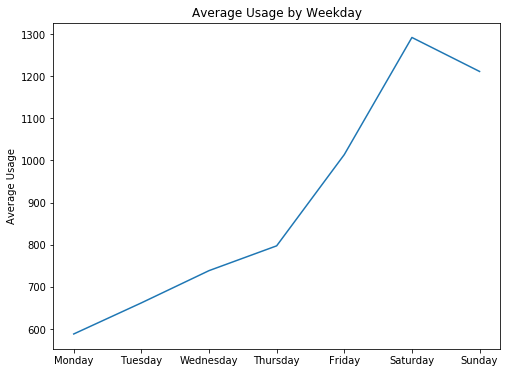

In [218]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


plt.plot(weekday_average['weekday'],weekday_average['value'])
plt.title('Average Usage by Weekday')
plt.ylabel('Average Usage')
plt.xticks(np.arange(7), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

Based on the above graph, we can see that the highest usage occurs on the three weekend days of Friday, Saturday and Sunday. The earlier days in the week have much less use, though they do has a slight upward trend. Sunday has slightly less use than Saturday, but still significantly more than the weekdays.

In [219]:
logins_1hr['time'] = logins_1hr['login_time'].dt.time
logins_15min['time'] = logins_15min['login_time'].dt.time

In [220]:
hourly_avg = logins_1hr.groupby(by='time').mean().reset_index()
min15_avg = logins_15min.groupby(by='time').mean().reset_index()

Text(0, 0.5, 'Average Usage')

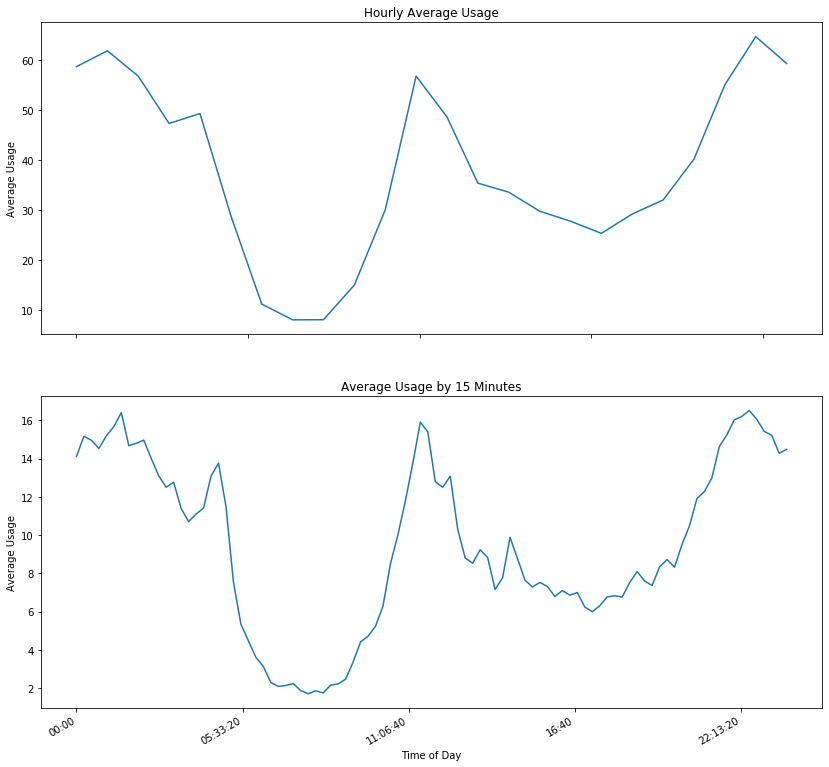

In [221]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,1,1)
plt.plot(hourly_avg['time'],hourly_avg['value'])
plt.gcf().autofmt_xdate()
plt.title('Hourly Average Usage')
plt.xlabel('Time of Day')
plt.ylabel('Average Usage')

plt.subplot(2,1,2)
plt.plot(min15_avg['time'],min15_avg['value'])
plt.gcf().autofmt_xdate()
plt.title('Average Usage by 15 Minutes')
plt.xlabel('Time of Day')
plt.ylabel('Average Usage')

Note that the above graphs show similar trends, with the bottom graph showing more detail, as it is by 15 minute intervals, rather than hourly intervals. Both graphs start at mindnight, and finish at midnight the next day. It would appear that there are two relative spikes in use over the course of the day. The first, shown at the beginning and end of the day, peaking just before midnight, could be from people getting home from after work activities. The second spike appears at around lunch time, and most likely is due to people taking a taxi to lunch.

While there appears to be no data quality issues in this portion of the data set, all of the values are either summed or averaged to help decrease the effects of outliers. By doing such a grouping, and also looking at the trends of the data at multiple levels of time grouping, it is possible to make conclusions even if there are chunks with poor data.

### Part 2: Experiment and Metrics Design

1. I would use pickup location along with total trips to assess the sucess of this experiment. By grouping the trips by city, and then marking the percentage of each city per driver, it can be seen where they habitually provide service.  I would use this calculated measure to determine success as the current goal of the cities is not to increase the use of Ultimate on the whole, but to increase the cross pollenation of drivers between the two cities. This percentage value can then be used in the experimental design described below.

2. a. The experiement will be done over the course of 2 months. In the first month, a random sample of drivers would be taken from the entire driver pool. This sample size can be determined by the constraints of budget, as a t-test will be used later, which allows for smaller sample sizes. These drivers would have their pickup locations recorded over the course of the month, and then the proportion of those pickups in each city recorded. They would then be divided into two separate goroups based on those proportions: those who service Gotham more, and those who service Metropolis more. Then for the second month of the experiement, all of the sampled drivers would be reimbursed for their toll fees, and over the course of the month, all pickup locations would be recorded. Then, at the end of the second month, each driver would get a new proportion value based on the new data. Note that a driver who was found to service Gotham more in the first month would keep their Gotham proportion as their value for both of the months while a driver found to service Metropolis more would keep their Metropolis proportion for both of the months.
    b. In order to determine any statistical significance from the above experiment, 2 metrics would be calculated, one on each of the sub groups. In both cases, the test would be a paired t-test. In the case of the group who started servicing Gotham more, the null hypothesis would be that the mean difference in their proportion of serving Gotham before and after is zero. We would perform a lower tailed test to give an alternative hypothesis that the mean difference in their proprtion of serving Gotham is smaller than 0, thus meaning that they served Gotham less in the second month, and must have served Metropolis. The same logic is then applied to a lower-tailed paired t-test with the Metropolis group.
    c. There are 4 different possibilities for this experiment and the paired t-test outcomes. First, both of the t-tests could not reject the null hypothesis. In this case, there is no statistical evidence that the mean difference is zero or less than zero, so the test is inconclusive. A new experiment would have to be designed, or the previous one analysed in a different way to deal with not rejecting the null hypothesis. The second case is that the null hypothesis is rejected for the Gotham group and not the Metropolis group. That means that the Gotham drivers did service more Metropolis users in the second month, but we can make no conclusion about the Metropolis drivers. The third case is the inverse of the second case, and would conclude that Metropolis drivers serviced more Gotham users, but we can make no conclusion about the Gotham drivers. Finally, if both t-tests reject the null hypothesis, the experiement shows the program is fully successful, and that both sets of drivers serviced the other city more often than before.
    

Experimental drawbacks: There are few drawbacks to the experiemental design about. First, it has not way of factoring in if drivers change their frequency of trips under the new or old system. So, a driver who makes 1 trip in Metropolis and 10 trips in Gotham the first month, and then 1 and 5 respectively in the second month will still tend towards rejecting the null hypothesis, when the case may be that they just had fewer trips total. Another is that it doesn't account for cross-city trips, as only the pickup location is counted. So, if a driver took a client from Gotham to Metropolis, and then drove back to Gotham to pick up another client, the driver would never show being in Metropolis. While this may not occur many times, it is not accounted for in this experiemental design.

### Part 3: Predictive Modeling

Explore this portion of the data set

In [222]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [223]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Mini EDA of the full user dataset

Note: The na values will be dealt with after EDA

In [224]:
data.sort_values(by='last_trip_date', ascending=False).head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
4486,11.94,5.0,5.0,1.0,Winterfell,2014-07-01,Android,2014-01-25,0.0,4,True,25.0


In [225]:
active_date = pd.to_datetime('2014-06-01')

In [226]:
data['retain'] = data['last_trip_date'].apply(lambda x: 'Retained' if x >= active_date else 'Not Retained')

In [227]:
retain_data = data['retain'].reset_index()
sum_of_retain = retain_data.groupby(by='retain').count()

In [228]:
sum_of_retain.columns=['count']

([<matplotlib.patches.Wedge at 0x25a4d3d2908>,
 [Text(-0.41750131984194816, 1.0176898584196619, 'Not Retained'),
  Text(0.41750141512494754, -1.0176898193303627, 'Retained')],
 [Text(-0.2277279926410626, 0.5551035591379974, '62.4%'),
  Text(0.2277280446136077, -0.5551035378165614, '37.6%')])

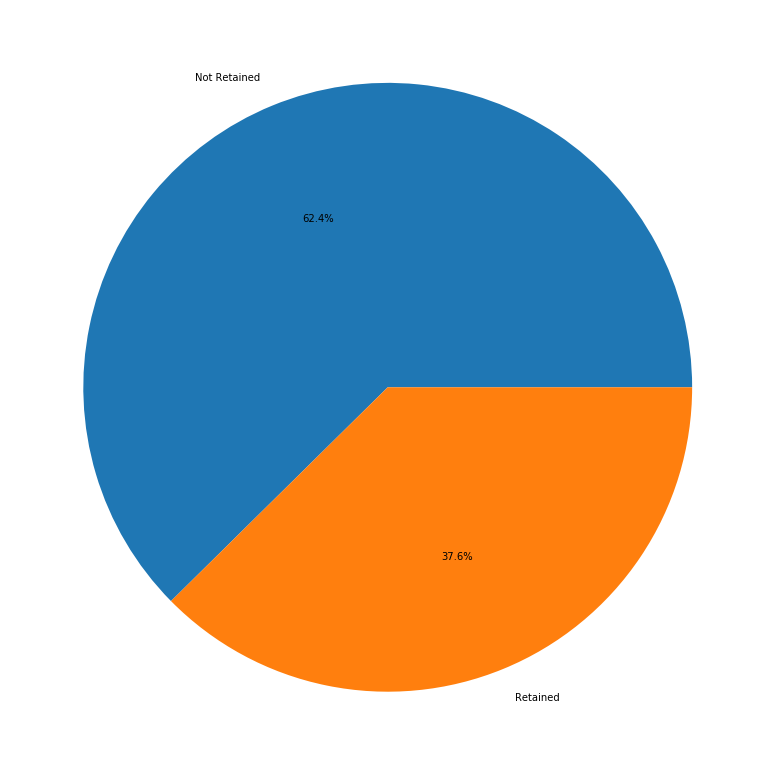

In [229]:
plt.pie(sum_of_retain['count'],labels=('Not Retained','Retained'),autopct='%1.1f%%')

Notice that the number of retained users is only a third of the entire dataset, suggesting that continued use of the service is not what the majority of users do.

In [230]:
cities_data = data['city'].reset_index()
count_of_cities = cities_data.groupby(by='city').count()
count_of_cities.columns=['count']

In [231]:
count_of_cities['count'].index

Index(['Astapor', 'King's Landing', 'Winterfell'], dtype='object', name='city')

Text(0, 0.5, 'Count')

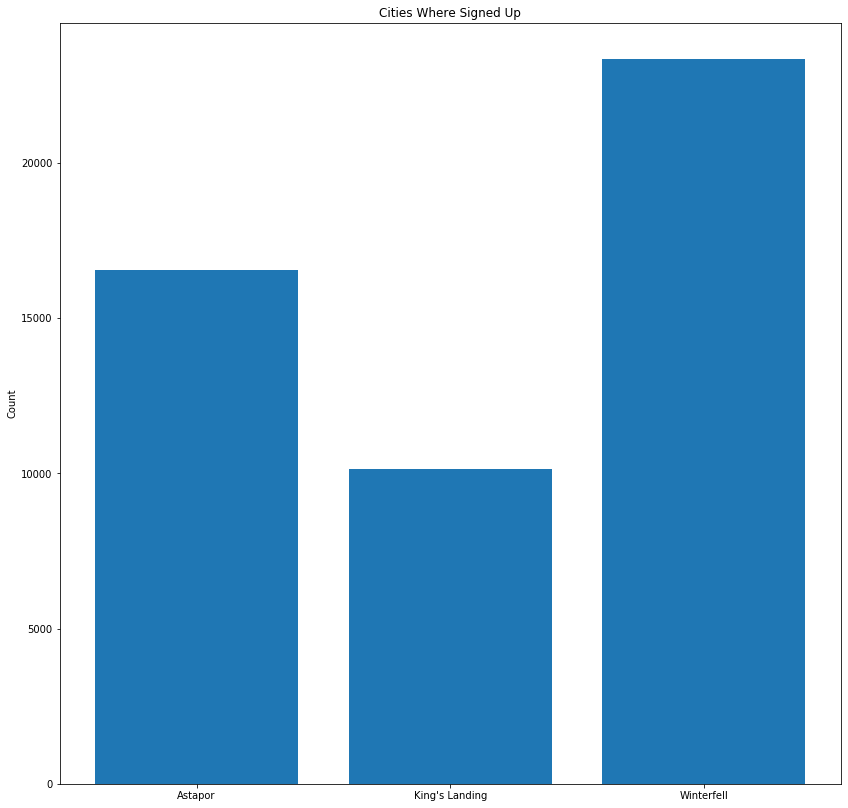

In [232]:
plt.bar(np.arange(3), count_of_cities['count'])
plt.xticks(np.arange(3),('Astapor',"King's Landing",'Winterfell'))
plt.title('Cities Where Signed Up')
plt.ylabel('Count')

While Winterfell had the largest number of signups, all of the cities have large numbers of people who signed up in their areas.

(array([4.7232e+04, 2.4750e+03, 2.4400e+02, 3.9000e+01, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.   ,  16.096,  32.192,  48.288,  64.384,  80.48 ,  96.576,
        112.672, 128.768, 144.864, 160.96 ]),
 <a list of 10 Patch objects>)

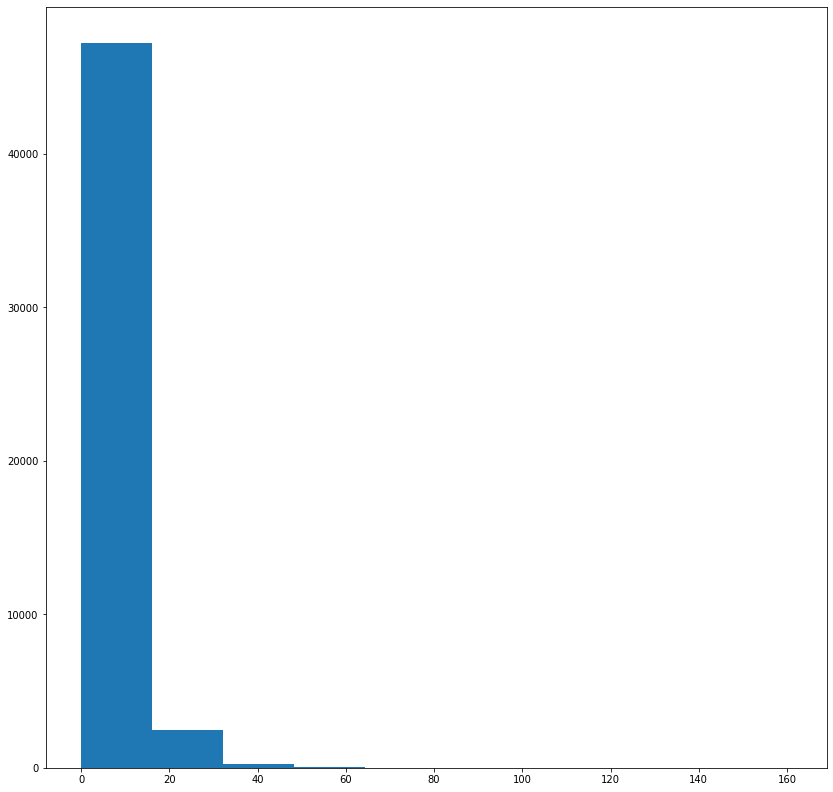

In [233]:
plt.hist(data['avg_dist'], bins = 10)

Most users had fairly short trips when they first signed up, as the data is heavily left skewed.

(array([3.5614e+04, 2.4340e+03, 2.5920e+03, 1.5400e+03, 1.4850e+03,
        1.3650e+03, 1.3490e+03, 1.7600e+02, 3.2700e+02, 2.7000e+01,
        1.3780e+03, 2.7000e+01, 4.7000e+01, 1.6800e+02, 5.0000e+00,
        3.4000e+01, 1.4000e+01, 2.0000e+00, 0.0000e+00, 1.4160e+03]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

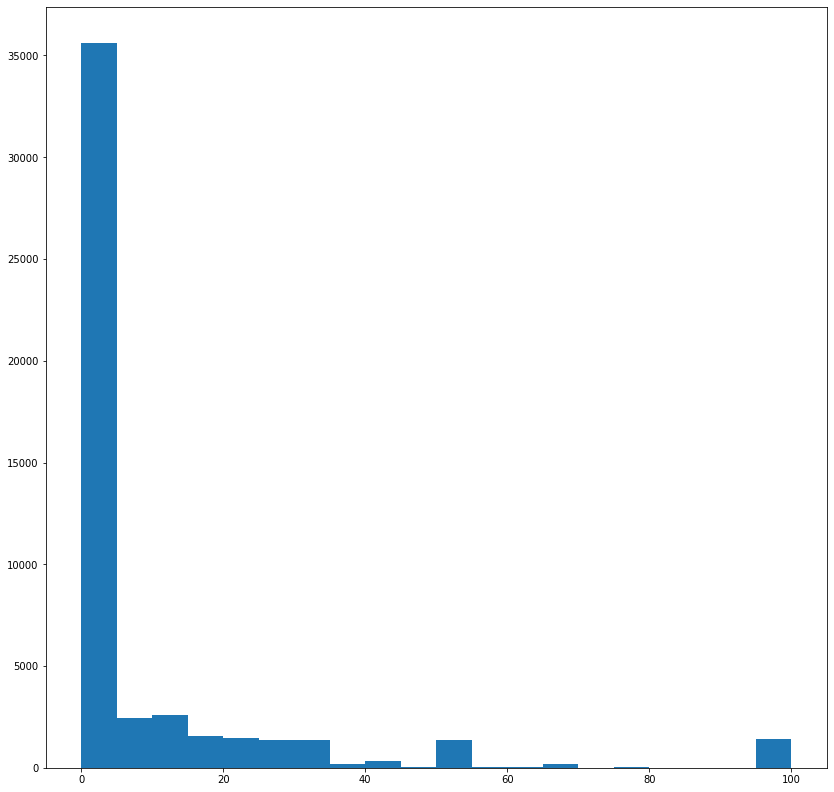

In [234]:
plt.hist(data['surge_pct'], bins=20)

While many kept out of surge times,there were still small peaks at 50%, and just under 90%, representing travellers who travelled at peak times 50% of the time, and nearly 100% of the time respectively.

(array([ 9244.,   503.,  1565.,  2419.,  2005.,  6098.,  4822.,  3265.,
         2650., 17429.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

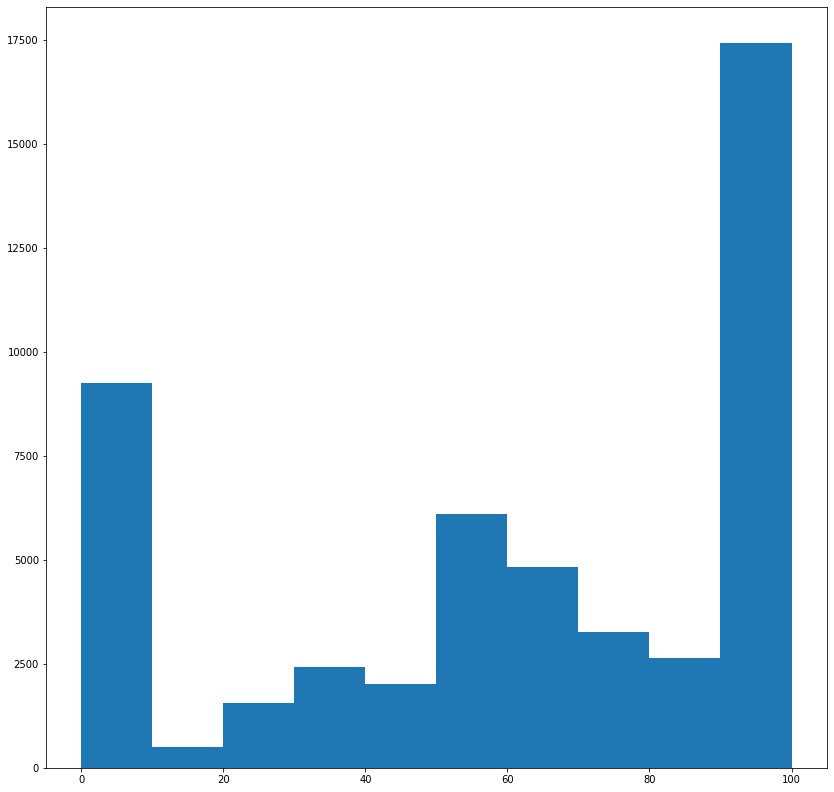

In [235]:
plt.hist(data['weekday_pct'],bins=10)

This distribution shows a few different spikes. The first occurs near 0, representing the users who signed up and either never used the service on weekdays, or only did once or twice. In the middle there is a wider bump, representing those who are just as likely to use the service on a weekday as a weekend. Finally, the largest spike on the far right shows those who use the service mainly on weekdays. These likely represent those who use the service for commuting, or for lunches at work.

2. Create a Model

For this data, I chose to use logistic regression, as the output is a binary variable, so it fits into logistic regression well. Also, logistic regression gives clear values for outputs that allow for fairly quick analysis and understanding. This could also be modelled with any number of other algorithms, including random forest or naive bayes. Logistic regression will allow for some colinearity between variables that may occur in this dataset, so it is also a solid fit in this case.

Below is first the data manipulation needed for modeling, and the the modeling itself, including thresholding.

In [236]:
data_dropnarows = data.dropna(axis=0)
data_dropnacols = data.dropna(axis=1)

In [237]:
data_dropnacols.dtypes

avg_dist                         float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
retain                            object
dtype: object

The na values are handled in two different ways, and each dataset will be analyzed below in parallel. The first method involves dropping all of the rows with na values. This removes 8,555 rows, or 17% of the data. The second method drops the columns that have na values, specifically the average rating by driver and the average rating of drivers. Both methods have their drawbacks, with the first losing many, possibly indicative rows, while the second loses 2 possibly helpful columns. In both cases, this step could be further refined with a more in depth analysis.

In [238]:
def make_model_df(df, cols_list):
    df_out = pd.get_dummies(df, columns=cols_list)
    df_out['ultimate_black_user'] = data['ultimate_black_user'].astype('int')
    end_date = data.sort_values(by='last_trip_date', ascending=True)['last_trip_date'].iloc[-1]
    df_out['time_from_last'] = data['last_trip_date'].apply(lambda x: (end_date-x).days)
    df_out['time_from_signup'] = data['signup_date'].apply(lambda x: (end_date-x).days)
    data_to_model = df_out.drop(['last_trip_date','signup_date','retain'],axis=1)
    data_y = df_out['retain']
    data_y = data_y.astype('category')
    data_y = data_y.cat.codes
    return data_to_model, data_y

In [239]:
datar_X, datar_y = make_model_df(data_dropnarows, ['city','phone'])
datac_X, datac_y = make_model_df(data_dropnacols, ['city'])

The above step via the make_model_df creates a pair of dataframes, one the features to input and the second to learn on (the outputs). This cleaning includes creating indicator variables for categorical variables (for ease of understanding in the model), creating length of time that people have been in the app in order to numerically represent trip dates, and spliting the datasets appropriately to prep for modeling.

In [240]:
#second, model using logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
import statsmodels.api as sm


trainr_X, testr_X, trainr_y, testr_y = train_test_split(datar_X,datar_y, random_state=0)
trainc_X, testc_X, trainc_y, testc_y = train_test_split(datac_X,datac_y, random_state=0)


In [241]:
def normalize(df, test):
    col_names = df.columns
    for col in col_names:
        col_mean = df[col].mean()
        col_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-col_mean)/col_std)
        test[col] = test[col].apply(lambda x: (x-col_mean)/col_std)
    return df, test

In [242]:
trainr_X, testr_X = normalize(trainr_X, testr_X)
trainc_X, testc_X = normalize(trainc_X, testc_X)

C:\Users\sagun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sagun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sagun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [243]:
regr = sm.Logit(endog=trainr_y, exog=trainr_X)
regc = sm.Logit(endog=trainc_y, exog=trainc_X)

In [244]:
resultr = regr.fit_regularized(method='l1')
resultc = regc.fit_regularized(method='l1')

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2727768898984263
            Iterations: 42
            Function evaluations: 42
            Gradient evaluations: 42
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3026651089690178
            Iterations: 40
            Function evaluations: 41
            Gradient evaluations: 40


In [245]:
from sklearn.metrics import fbeta_score

predr = regr.predict(resultr.params, exog=testr_X)
predc = regc.predict(resultc.params, exog=testc_X)

In [246]:
def threshold_and_binary(df, y_test):
    threshold_list = np.arange(0, 1.01, 0.01)
    best_threshold = 0
    best_accuracy = 0
    df = pd.DataFrame(df)
    for i in threshold_list:
        Y_test_pred = df.applymap(lambda x: 1 if x>i else 0)
        test_accuracy = fbeta_score(Y_test_pred, y_test, beta=1)
        if test_accuracy > best_accuracy:
            best_threshold = i
            best_accuracy = test_accuracy
    print('Best Threshold is {0} with and fbeta of {1}'.format(best_threshold, best_accuracy))

In [247]:
threshold_and_binary(predr, testr_y)
threshold_and_binary(predc, testc_y)

C:\Users\sagun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Best Threshold is 0.81 with and fbeta of 0.9345326198337697
Best Threshold is 0.8 with and fbeta of 0.9223431829963712


In [248]:
resultr.summary()

C:\Users\sagun\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\sagun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sagun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sagun\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31083
Model:                          Logit   Df Residuals:                    31068
Method:                           MLE   Df Model:                           14
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                  0.5966
Time:                        17:11:14   Log-Likelihood:                -8478.7
converged:                       True   LL-Null:                       -21018.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
avg_dist                  -0.0371      0.021     -1.746      0.081      -0.079       0.005
avg_rating_by_driver      -0.0327      0.020     -1.598      0.110      -0.073       0.007
avg_rating_of_driver      -0.0125      0.020     -0.631      0.528      -0.051       0.026
avg_surge                  0.1110      0.035      3.196      0.001       0.043       0.179
surge_pct                 -0.0346      0.035     -0.997      0.319      -0.103       0.033
trips_in_first_30_days     0.4719      0.027     17.313      0.000       0.418       0.525
ultimate_black_user        0.4005      0.021     19.316      0.000       0.360       0.441
weekday_pct               -0.0685      0.021     -3.309      0.001      -0.109      -0.028
city_Astapor              -0.3517        nan        nan        nan         nan         nan
city_King's Landing        0.5262        nan        nan        nan         nan         nan
city_Winterfell           -0.0999        nan        nan        nan         nan         nan
phone_Android             -0.1857   2.55e+06  -7.29e-08      1.000   -4.99e+06    4.99e+06
phone_iPhone               0.1857   2.55e+06   7.29e-08      1.000   -4.99e+06    4.99e+06
time_from_last            -2.8597      0.032    -88.666      0.000      -2.923      -2.796
time_from_signup           0.1026      0.020      5.214      0.000       0.064       0.141
==========================================================================================
"""

In [249]:
resultc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                37500
Model:                          Logit   Df Residuals:                    37489
Method:                           MLE   Df Model:                           10
Date:                Tue, 28 Apr 2020   Pseudo R-squ.:                  0.5430
Time:                        17:11:14   Log-Likelihood:                -11350.
converged:                       True   LL-Null:                       -24834.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
avg_dist                  -0.0285      0.018     -1.613      0.107      -0.063       0.006
avg_surge                  0.1159      0.029      3.975      0.000       0.059       0.173
surge_pct                 -0.0394      0.029     -1.346      0.178      -0.097       0.018
trips_in_first_30_days     0.5792      0.025     23.078      0.000       0.530       0.628
ultimate_black_user        0.3878      0.018     21.768      0.000       0.353       0.423
weekday_pct               -0.0761      0.018     -4.331      0.000      -0.110      -0.042
city_Astapor              -0.3158   2.05e+06  -1.54e-07      1.000   -4.02e+06    4.02e+06
city_King's Landing        0.4861   1.74e+06   2.79e-07      1.000   -3.42e+06    3.42e+06
city_Winterfell           -0.0924   2.17e+06  -4.26e-08      1.000   -4.25e+06    4.25e+06
time_from_last            -2.5807      0.025   -101.497      0.000      -2.631      -2.531
time_from_signup           0.1184      0.017      6.973      0.000       0.085       0.152
==========================================================================================
"""

Above are the two summaries of the two logistic regression models for the two different methods of handling null values in the dataset. They both produce very similar results, with the only difference coming in the size of the coefficients of the variables. Those changes are small, and since the two models produce good results with an f1 score of more that 0.92, either model could be used.

Features with an effect: Note variables are only included if their coefficient is significantly different from zero.

Positive Effects:
avg_surge: The more often someone uses the service at surge times, the slightly more likely they are to continue using the service.
trips_in_first_30_days; Users who use the app in the first 30 days after signing up are more likely to continue to use the service.
ultimate_black_user: Users who use the ultimate black service in the first month are more likely to be retained.
time_from_signup: Someone who has had the service for longer is more likely to continue using the service

Negative Effects:
weekday_pct: The more a user uses the service during the week, the less likely they are to continue using hte service.
time_from_last: The longer it has been since a user has used the service, the less likely they are to use it. This has the largest effect of any of the features in the set.

Cities: Users in Asataphor and Winterfell are slightly less likely to continue using the service, while those in King's Landing are more likely to use it.

Possible Improvements/Focuses for future retention:

1. Remind users that the service exists, as those who have used the app more recently are more likely to use it again.
2. Increase marketing in Asatpor and Winterfell, where users are less likely to be retained.
3. Give users a credit for ultimate black to give them a chance to use that part of the service and be more likely to be retained.